In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define file paths
file_paths = {
    'Benin': '../../data/benin_clean.csv',
    'Sierraleone': '../../data/sierraleone_clean.csv',
    'Togo': '../../data/togo_clean.csv'
}

# Dictionary to store DataFrames
dfs = {}

# Load each CSV
try:
    for country, path in file_paths.items():
        dfs[country] = pd.read_csv(path, parse_dates=['Timestamp'])
        print(f"Loaded {country} dataset with {len(dfs[country])} rows.")
    print("All datasets loaded successfully.")
except Exception as e:
    print(f"Error loading dataset(s): {e}")

Loaded Benin dataset with 525600 rows.
Loaded Sierraleone dataset with 525600 rows.
Loaded Togo dataset with 525600 rows.
All datasets loaded successfully.


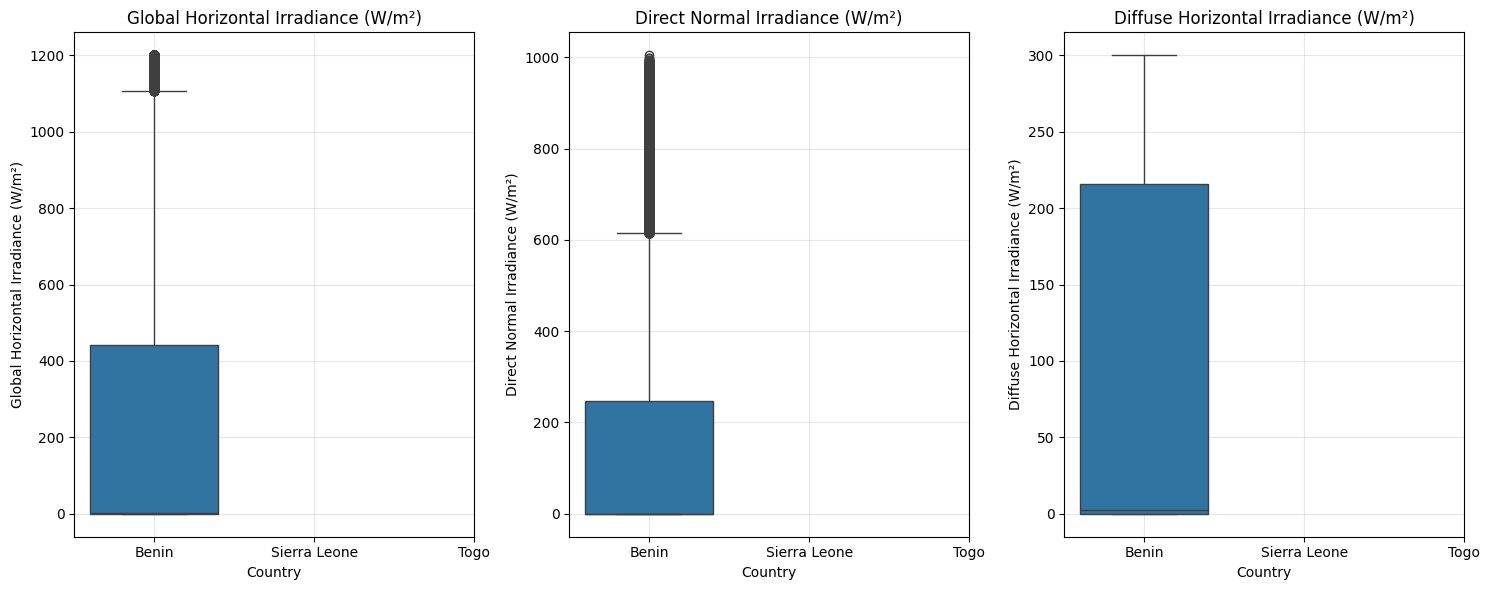